In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.data.shape

(70000, 784)

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

In [3]:
data,target = fetch_openml('mnist_784', version=1, cache=True, return_X_y = True)
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
data.shape

(70000, 784)

In [5]:
target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
target.shape

(70000,)

In [7]:
data[0].reshape(28,28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

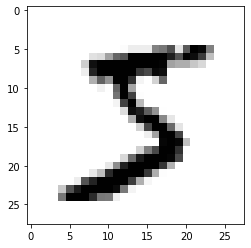

In [8]:
plt.imshow(data[0].reshape(28,28), cmap='gray_r')

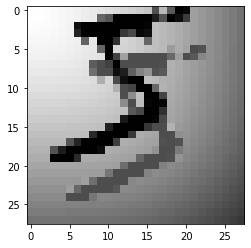

In [9]:
def add_shadow(data):
    data = data.reshape(28,28)
    for i in range(28):
        for j in range(28):
                if data[i,j] < 150:
                    if int((i**3+j**3)**(1/2)) <= 253:
                        data[i,j] = int((i**3+j**3)**(1/2))
                    else :
                        data[i,j] = 253
                else :
                    data[i-5,j-2] = data[i,j]
                    data[i,j] = data[i,j]-75
    data = data.reshape(784)
    return data
plt.imshow(add_shadow(data[0]).reshape(28,28), cmap='gray_r')

In [15]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(data,target,random_state=0)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain,ytrain)
print(Xtest.shape)
import numpy as np
for i in range(17500):
    Xtest[i] = add_shadow(Xtest[i])
ypred = model.predict(Xtest)
from sklearn import metrics
print(metrics.classification_report(ypred,ytest))

(17500, 784)


ValueError: could not broadcast input array from shape (784,1) into shape (784)

Text(91.68, 0.5, 'predicted label')

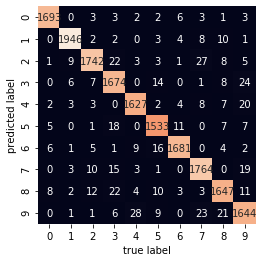

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,ypred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')